In [3]:
#Import the necessary libraries for the project
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Import the warnings
import warnings

# Import statsmodels
import statsmodels.formula.api as smf
import statsmodels.api as sm

from statsmodels.sandbox.regression.predstd import wls_prediction_std

# Import RMSE
from statsmodels.tools.eval_measures import rmse

# Imort Linear Regression from scikit-learn
from sklearn.linear_model import LinearRegression

# Import Polynomial Features
from sklearn.preprocessing import PolynomialFeatures

# Import the Train Test Split capability from sk-learn
from sklearn.model_selection import train_test_split 

# Import the metrics
from sklearn.metrics import mean_squared_error, r2_score

# configuration settings
%matplotlib inline 
sns.set(color_codes=True)
warnings.filterwarnings('ignore') 

In [4]:
#Acquire data
#Read primary_school_enrollment_by_residence_gender csv file for exploration
enrol_data_df=pd.read_csv('primary_enrollement_by_residence_gender.csv')

#preview data
enrol_data_df.head()

,objectid,county,urban_semiurban_boys_number,urban_semiurban_girls_number,urban_semiurban_total_number,rural_boys_number,rural_girls_number,rural_total_number,year_
0,1,BARINGO,4861,4816,9677,68713,65056,133769,2014-12-31T00:00:00.000Z
1,2,BOMET,3382,3467,6849,111649,108549,220198,2014-12-31T00:00:00.000Z
2,3,BUNGOMA,19480,22725,42205,233557,233804,467361,2014-12-31T00:00:00.000Z
3,4,BUSIA,10901,10822,21723,113750,115381,229131,2014-12-31T00:00:00.000Z
4,5,EMBU,2715,2647,5362,56923,56633,113556,2014-12-31T00:00:00.000Z


In [5]:
#Analyze by describing data
enrol_data_df.describe()

,objectid,urban_semiurban_boys_number,urban_semiurban_girls_number,urban_semiurban_total_number,rural_boys_number,rural_girls_number,rural_total_number
count,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000
mean,24.000000,16082.340426,15919.510638,32001.851064,87130.319149,84141.702128,171272.021277
std,13.711309,29828.143027,30759.500431,60554.527417,55197.145354,56296.699088,111372.047468
min,1.000000,267.000000,301.000000,568.000000,1261.000000,1322.000000,2583.000000
25%,12.500000,2953.500000,2768.500000,5722.000000,44222.000000,41750.000000,84224.000000
50%,24.000000,7341.000000,7801.000000,14644.000000,84323.000000,80773.000000,165696.000000
75%,35.500000,16170.500000,15329.500000,30819.500000,117443.500000,114946.500000,230955.000000
max,47.000000,193562.000000,201169.000000,394731.000000,250541.000000,257147.000000,507688.000000


In [6]:
enrol_data_df.describe(include = 'object')

,county,year_
count,47,47
unique,47,1
top,TANA-RIVER,2014-12-31T00:00:00.000Z
freq,1,47


In [7]:
enrol_data_df.columns.values

array(['objectid', 'county', 'urban_semiurban_boys_number',
       'urban_semiurban_girls_number', 'urban_semiurban_total_number',
       'rural_boys_number', 'rural_girls_number', 'rural_total_number',
       'year_'], dtype=object)

In [8]:
enrol_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 9 columns):
objectid                        47 non-null int64
county                          47 non-null object
urban_semiurban_boys_number     47 non-null int64
urban_semiurban_girls_number    47 non-null int64
urban_semiurban_total_number    47 non-null int64
rural_boys_number               47 non-null int64
rural_girls_number              47 non-null int64
rural_total_number              47 non-null int64
year_                           47 non-null object
dtypes: int64(7), object(2)
memory usage: 3.4+ KB


In [9]:
enrol_data_df.isnull().any()

objectid                        False
county                          False
urban_semiurban_boys_number     False
urban_semiurban_girls_number    False
urban_semiurban_total_number    False
rural_boys_number               False
rural_girls_number              False
rural_total_number              False
year_                           False
dtype: bool

In [10]:
#The enrollment of both boys and girls seems higher in rural areas than in urban areas.
#The average enrollment of boys seems higher both for rural and urban areas.


In [11]:
enrol_data_df[['county']].count()

county    47
dtype: int64

In [12]:
# using apply function to create new columns 
enrol_data_df['boys_total_number'] = enrol_data_df.apply(lambda row: row.urban_semiurban_boys_number + 
                                  row.rural_boys_number, axis = 1) 
enrol_data_df['girls_total_number'] = enrol_data_df.apply(lambda row: row.urban_semiurban_girls_number + 
                                  row.rural_girls_number, axis = 1) 
enrol_data_df.head()

,objectid,county,urban_semiurban_boys_number,urban_semiurban_girls_number,urban_semiurban_total_number,rural_boys_number,rural_girls_number,rural_total_number,year_,boys_total_number,girls_total_number
0,1,BARINGO,4861,4816,9677,68713,65056,133769,2014-12-31T00:00:00.000Z,73574,69872
1,2,BOMET,3382,3467,6849,111649,108549,220198,2014-12-31T00:00:00.000Z,115031,112016
2,3,BUNGOMA,19480,22725,42205,233557,233804,467361,2014-12-31T00:00:00.000Z,253037,256529
3,4,BUSIA,10901,10822,21723,113750,115381,229131,2014-12-31T00:00:00.000Z,124651,126203
4,5,EMBU,2715,2647,5362,56923,56633,113556,2014-12-31T00:00:00.000Z,59638,59280


In [13]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] =10
plt.rcParams["figure.figsize"] = fig_size

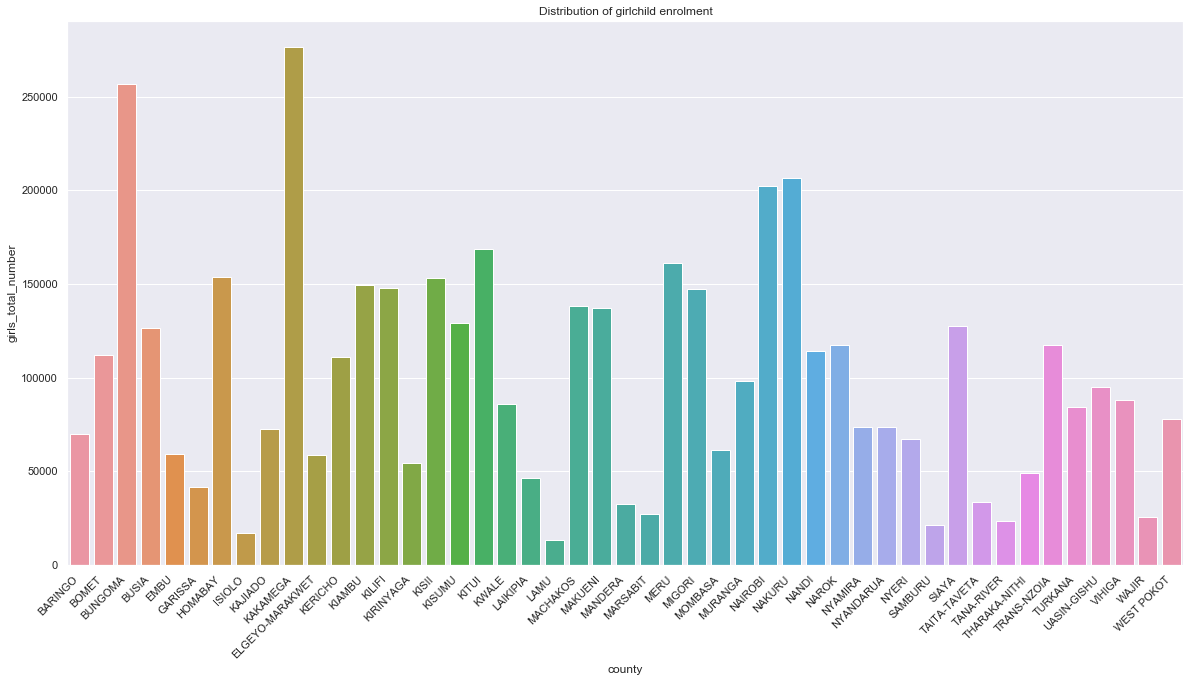

In [14]:
#create a barplot to show the girlchild enrolment in the country in the year 2014
sns.set(style='darkgrid')
plt.title('Distribution of girlchild enrolment')
chart=sns.barplot(x='county',y='girls_total_number',data=enrol_data_df)

chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
chart

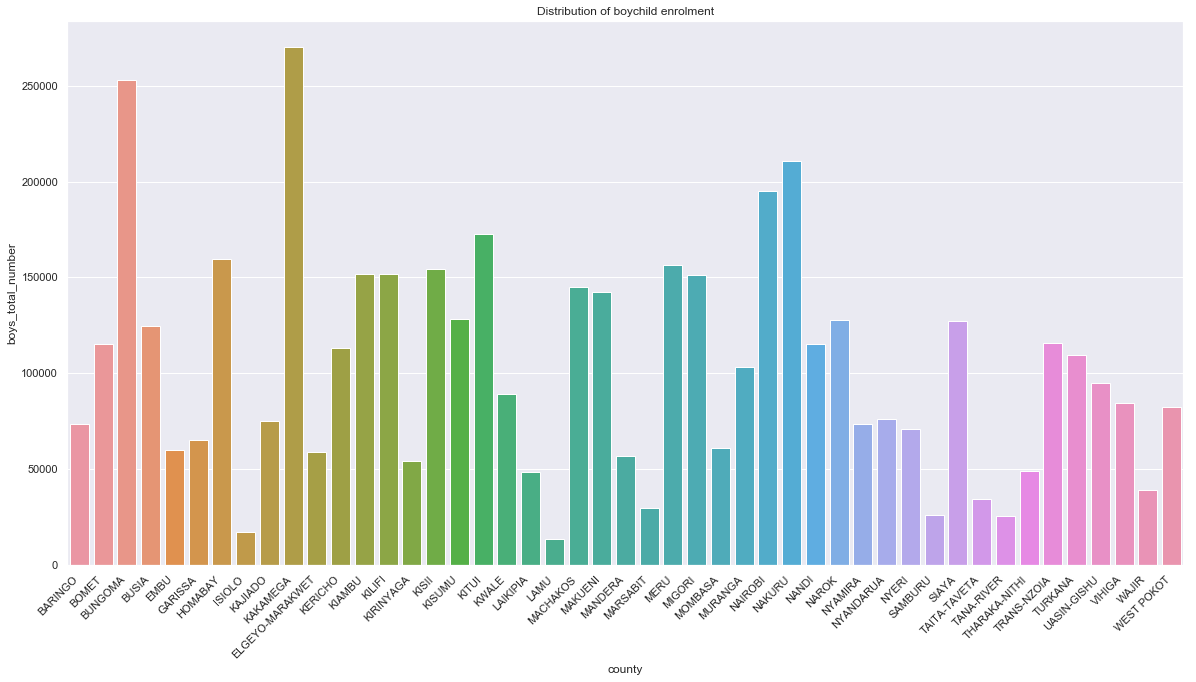

In [15]:
#create a barplot to show the boychild enrolment in the country in the year 2014
sns.set(style='darkgrid')
plt.title('Distribution of boychild enrolment')
chart_1=sns.barplot(x='county',y='boys_total_number',data=enrol_data_df)

chart_1.set_xticklabels(chart_1.get_xticklabels(), rotation=45, horizontalalignment='right')
chart_1

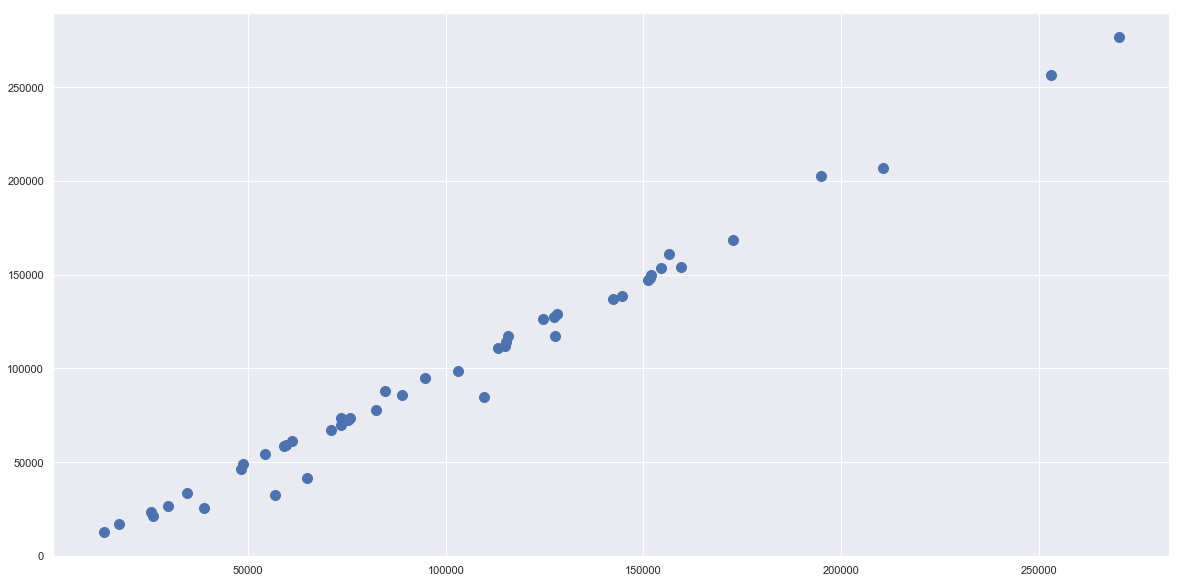

In [16]:
plt.scatter(enrol_data_df.boys_total_number, 
            enrol_data_df.girls_total_number, s=100)

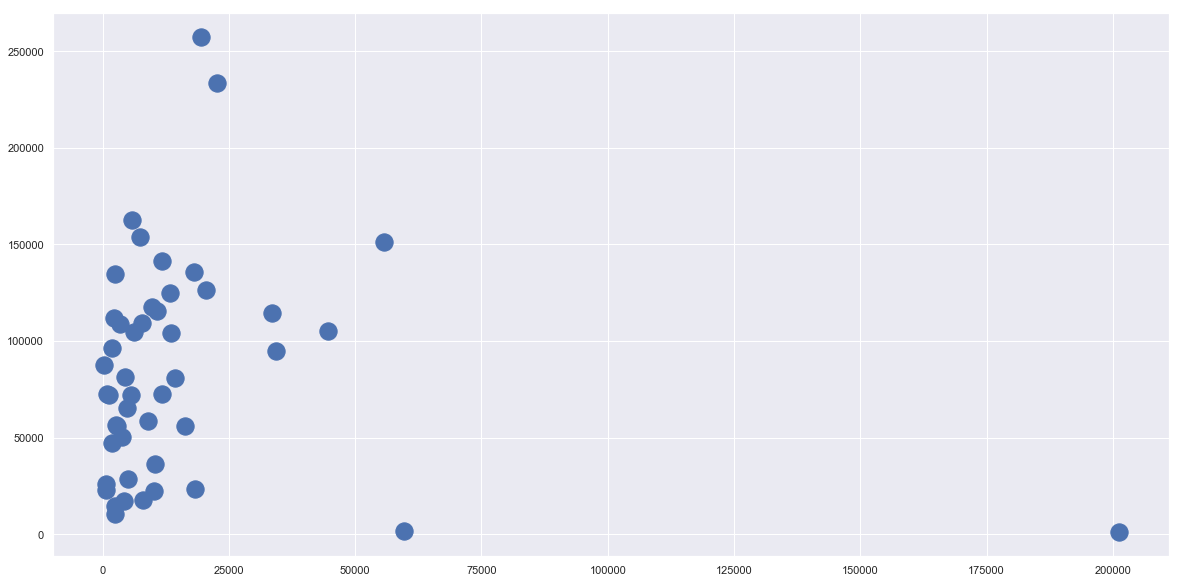

In [17]:
plt.scatter(enrol_data_df.
urban_semiurban_girls_number, enrol_data_df.rural_girls_number, s=300)

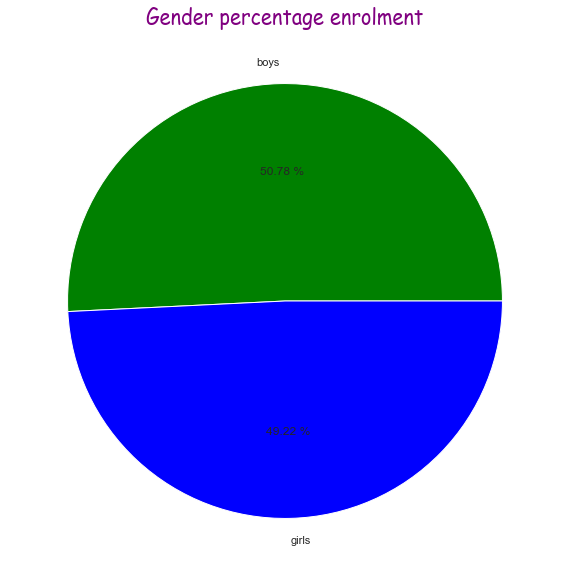

In [18]:
#Gender percentage enrolment

#Start by summing up the total number of boys enroled and the total number of girls enroled 
boys=enrol_data_df['boys_total_number'].sum()
girls=enrol_data_df['girls_total_number'].sum()

#Add labels
labels=['boys','girls']

#Add colours
colors=['green','blue']

#Plot the chart 
plt.pie([boys,girls], labels=labels, colors=colors,autopct='%.2f %%')

#Add a title
plt.title('Gender percentage enrolment',loc ='center',pad=None,
         fontdict={'fontname':'Comic Sans MS','fontsize':20,'color':'purple'})

#Show
plt.show()

In [19]:
#Prepare training dataset
train_data_df=enrol_data_df.drop(["year_"], axis=1)
train_data_df.head()

,objectid,county,urban_semiurban_boys_number,urban_semiurban_girls_number,urban_semiurban_total_number,rural_boys_number,rural_girls_number,rural_total_number,boys_total_number,girls_total_number
0,1,BARINGO,4861,4816,9677,68713,65056,133769,73574,69872
1,2,BOMET,3382,3467,6849,111649,108549,220198,115031,112016
2,3,BUNGOMA,19480,22725,42205,233557,233804,467361,253037,256529
3,4,BUSIA,10901,10822,21723,113750,115381,229131,124651,126203
4,5,EMBU,2715,2647,5362,56923,56633,113556,59638,59280


In [20]:
#change categorical data to numerical data
train_data_df["county"] = pd.Categorical(train_data_df["county"])
county_categories = train_data_df.county.cat.categories
train_data_df["county"] = train_data_df.county.cat.codes
train_data_df.tail()

,objectid,county,urban_semiurban_boys_number,urban_semiurban_girls_number,urban_semiurban_total_number,rural_boys_number,rural_girls_number,rural_total_number,boys_total_number,girls_total_number
42,43,42,13504,11843,25347,96194,72666,168860,109698,84509
43,44,43,14095,14263,28358,80731,80773,161504,94826,95036
44,45,44,267,301,568,84323,87610,171933,84590,87911
45,46,45,9569,8004,17573,29280,17640,46920,38849,25644
46,47,46,5420,5520,10940,76878,72147,149025,82298,77667


In [21]:
#Create test data
#test_data=enrol_data_df[['objectid','county','boys_total_number']]
#test_data.head()

In [22]:
#Save the test data in a csv file 
#test_data.to_csv('test_data.csv', index=False)

Using Stats Model's Ordinary Least Squares Method y =βx + 𝛼
linear regression equation

In [35]:
# Initialise and fit linear regression model using `statsmodels`
stats_model = smf.ols('girls_total_number ~ boys_total_number', data=train_data_df)
stats_model = stats_model.fit()

We confirm the parameters

In [36]:
stats_model.params

Intercept           -5974.730616
boys_total_number       1.027354
dtype: float64

In [37]:
stats_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     girls_total_number   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     3970.
Date:                Thu, 16 Apr 2020   Prob (F-statistic):           1.55e-45
Time:                        17:24:50   Log-Likelihood:                -478.69
No. Observations:                  47   AIC:                             961.4
Df Residuals:                      45   BIC:                             965.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -5974.7306   1935.417     -3.087      0.003   -9872.861   -2076.600
boys_total_number     1.0274      0.016     63.009      0.000       0.995       1.060
==============================================================================
Omnibus:                       31.527   Durbin-Watson:                   2.211
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               63.290
Skew:                          -1.999   Prob(JB):                     1.81e-14
Kurtosis:                       7.042   Cond. No.                     2.40e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.4e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [38]:
# print the R-squared value for the model
stats_model.rsquared

0.988792335183524

In [39]:
# print the Adjusted R-squared value for the model
stats_model.rsquared_adj

0.9885432759653802

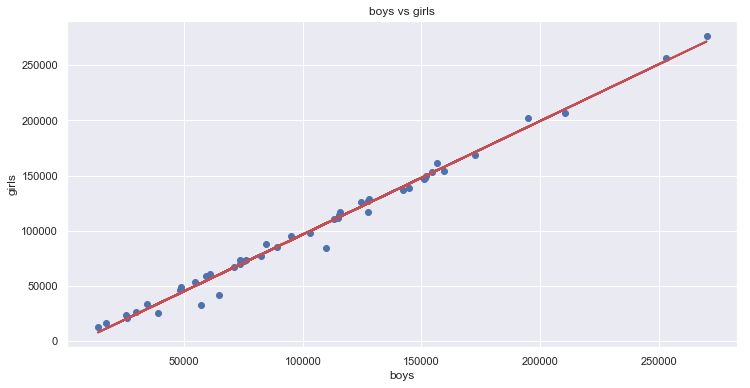

In [43]:
# Plot # Predict values
y_pred = stats_model.predict()

# Plot regression against actual data
plt.figure(figsize=(12, 6))
plt.plot(train_data_df[['boys_total_number']], train_data_df[['girls_total_number']], 'o')           # scatter plot showing actual data
plt.plot(train_data_df[['boys_total_number']], y_pred, 'r', linewidth=2)   # regression line
plt.xlabel('boys')
plt.ylabel('girls')
plt.title('boys vs girls')

plt.show()

Using the sci-kit library

In [47]:
#Modelling
#Assigning our X and Y values
X = train_data_df[['boys_total_number']]
y = train_data_df[['girls_total_number']]

In [48]:
#This is because we are using a single feature which is SHOP_WEEKDAY
X_reshaped=train_data_df['boys_total_number'].values.reshape(-1,1)
y_reshaped=train_data_df['girls_total_number'].values.reshape(-1,1)

In [50]:
X_train,X_test,y_train,y_test = train_test_split(X_reshaped,y_reshaped, test_size = 0.2, random_state=0)

In [51]:
#Initialize the Algorithm
regressor=LinearRegression()

In [52]:
#Train the algorithm
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [53]:
#To retrieve the intercept:
print(regressor.intercept_)

[-6361.94447667]


In [54]:
#For retrieving the slope:
print(regressor.coef_)

[[1.03532376]]


In [55]:
#Make predictions using the test sample
y_pred = regressor.predict(X_test)

In [56]:
#Compare the actual values
comparison_df = pd.DataFrame({'Actual':y_test.flatten(), 'Predicted' : y_pred.flatten()})
comparison_df

,Actual,Predicted
0,98400,100288.827164
1,73543,69708.469129
2,206658,211729.006541
3,59280,55382.694198
4,85735,85714.574530
5,110715,110773.550929
6,84509,107211.001855
7,114020,112948.766158
8,137251,140911.825717
9,58822,54726.298931


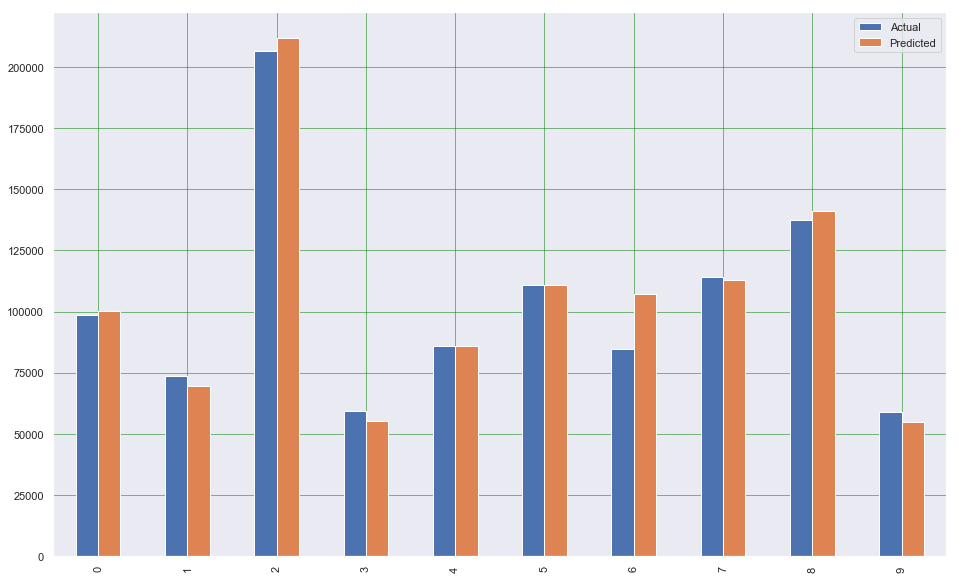

In [57]:
#Visualize the predicted against the actual values
#df1 = df.head(20)
comparison_df.plot(kind = 'bar', figsize = (16,10))
plt.grid(which='major', linestyle='-',linewidth='0.5', color='green')
plt.grid(which='minor', linestyle='-',linewidth='0.5', color='black')
plt.show()